# Dust Particle Detection on Solar Panels

### Objective

The objective of this deep learning project is to develop a model that can accurately predict the dirtiness of solar panels. This information can be used to schedule cleaning operations and optimize the performance of solar power systems.

### Background

Solar panels are a clean and renewable source of energy. However, they can become dirty over time, which can reduce the amount of solar energy absorbed by the solar panel. This directly leads to decrease in electricity generated. The amount of energy loss due to dirtiness can vary depending on the level of dirt and the type of solar panel. In addition to reducing the amount of electricity generated, and accumulation of dust and debris on solar panels the lifespan of the solar panels can be shorten.

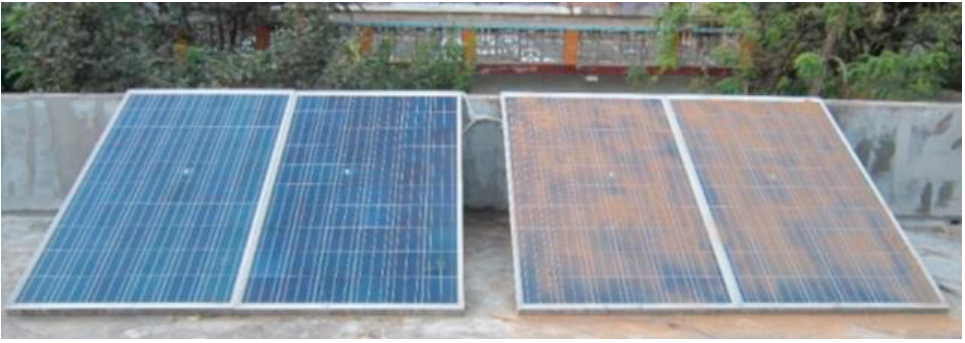

The image shows two solar panels used for the experiment to detect the effect of dust particles on solar panels on the energy generation.

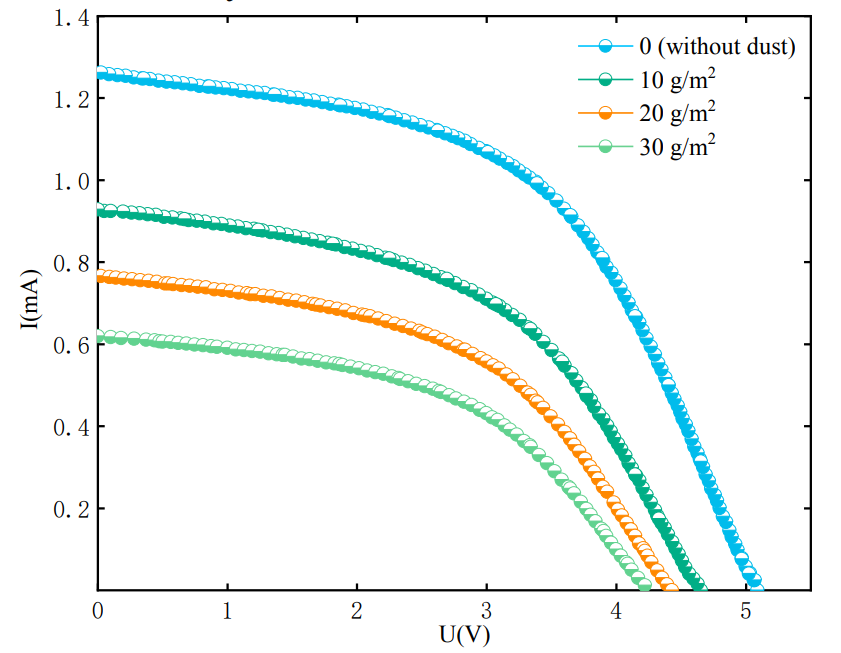

As shown in figure, the dust with a density of 10 g/m2 reduces the maximum power of the PV by about 34%, and the greater the dust density, the smaller the maximum power of the PV.

Therefore it is essential to maintain the cleanliness of solar panels to obtain the maximum efficiency out of them.

### Project Approach

This project will use a deep learning approach to develop a model that can predict the level of dirtiness of solar panels. The model will be trained on a dataset of images of solar panels with varying levels of dirtiness.

## Import Libraries and Modules

In [25]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from PIL import Image
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="tensorflow_io")
from sklearn.utils.class_weight import compute_class_weight
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications import InceptionV3
import tensorflow as tf

## Data Augmentation and Preprocessing

Data augmentation is used to artificially expand the size of the training dataset by applying random transformations to original images. 
Image pre-processing is done to normalize the images, making the training process efficient.

In [28]:
BATCH_SIZE = 48

image_height = 299
image_width = 299

By using this batch size, the model will receive 48 images at a time, process them, update the model weights based on the loss, and then move to the next batch.

In [33]:
data_generator_1 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=5,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.05,
    zoom_range=0.05,
    brightness_range = [0.95,1.05],
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode='nearest'                                   
)

data_generator_2 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    brightness_range = [0.9,1.1],
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode='nearest'                                   
)

data_generator_3 = ImageDataGenerator (rescale=1./255)

Data augmentation and preprocessing were done using TensorFlow.  
data_generator_1 generates mild augmentations to introduce mild variations.  
data_generator_2 generates stronger augmentations than the first one.  
data_generator_3 applies only re-scaling.